In [1]:
# Libraries use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from helper import create_dummy_df
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, optimizers, regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('../NYC/data/final_sample.csv')

num_cols = ['host_listings_count',
            'accommodates',
            'bathrooms',
            'price',
            'security_deposit',
            'cleaning_fee',
            'extra_people',
            'minimum_nights',
            'maximum_nights',
            'availability_30',
            'number_of_reviews',
            'host_active_days'
            ]

num_cols = [i for i in num_cols if i not in ['availability_30', 'host_active_days']]

for col in num_cols:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) 
    df[col] = np.log(df[col])

In [3]:
# Split data into features and target 'price'
X = df.drop('price', axis=1)
y = df.price

#Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [4]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

# Model 1: Random Forest Regression
regr_model = RandomForestRegressor()
regr_model.fit(X_train, y_train)

# Predict and score the model
y_test_preds = regr_model.predict(X_test)
y_train_preds = regr_model.predict(X_train)

#Scoring model
test_r2 = round(r2_score(y_test, y_test_preds),4)
train_r2 = round(r2_score(y_train, y_train_preds),4)
test_mse = round(mean_squared_error(y_test, y_test_preds),4)
train_mse = round(mean_squared_error(y_train, y_train_preds),4)

print('r-squared score for training set was {}. r-squared score for test set was {}.'.format(train_r2, test_r2))
print('MSE score for training set was {}. MSE score for test set was {}.'.format(train_mse, test_mse))

r-squared score for training set was 0.9477. r-squared score for test set was 0.6472.
MSE score for training set was 0.0295. MSE score for test set was 0.1934.


In [5]:
gradboost_model = GradientBoostingRegressor()
gradboost_model.fit(X_train, y_train)

# Predict and score the model
y_test_preds = gradboost_model.predict(X_test)
y_train_preds = gradboost_model.predict(X_train)

#Scoring model
test_r2 = round(r2_score(y_test, y_test_preds),4)
train_r2 = round(r2_score(y_train, y_train_preds),4)
test_mse = round(mean_squared_error(y_test, y_test_preds),4)
train_mse = round(mean_squared_error(y_train, y_train_preds),4)

print('r-squared score for training set was {}. r-squared score for test set was {}.'.format(train_r2, test_r2))
print('MSE score for training set was {}. MSE score for test set was {}.'.format(train_mse, test_mse))

r-squared score for training set was 0.5958. r-squared score for test set was 0.5873.
MSE score for training set was 0.2279. MSE score for test set was 0.2262.


In [6]:
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)

# Predict and score the model
y_test_preds = adaboost_model.predict(X_test)
y_train_preds = adaboost_model.predict(X_train)

#Scoring model
test_r2 = round(r2_score(y_test, y_test_preds),4)
train_r2 = round(r2_score(y_train, y_train_preds),4)
test_mse = round(mean_squared_error(y_test, y_test_preds),4)
train_mse = round(mean_squared_error(y_train, y_train_preds),4)

print('r-squared score for training set was {}. r-squared score for test set was {}.'.format(train_r2, test_r2))
print('MSE score for training set was {}. MSE score for test set was {}.'.format(train_mse, test_mse))

r-squared score for training set was 0.074. r-squared score for test set was 0.0486.
MSE score for training set was 0.5222. MSE score for test set was 0.5215.


In [7]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_train_preds = xgb_reg.predict(X_train)
y_test_preds = xgb_reg.predict(X_test)

#Scoring model
test_r2 = round(r2_score(y_test, y_test_preds),4)
train_r2 = round(r2_score(y_train, y_train_preds),4)
test_mse = round(mean_squared_error(y_test, y_test_preds),4)
train_mse = round(mean_squared_error(y_train, y_train_preds),4)

print('r-squared score for training set was {}. r-squared score for test set was {}.'.format(train_r2, test_r2))
print('MSE score for training set was {}. MSE score for test set was {}.'.format(train_mse, test_mse))

r-squared score for training set was 0.7655. r-squared score for test set was 0.6591.
MSE score for training set was 0.1323. MSE score for test set was 0.1869.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               38784     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 137,857
Trainable params: 137,857
Non-trainable params: 0
_________________________________________________________________
None


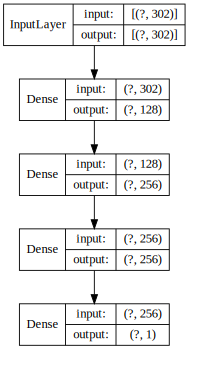

In [8]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(optimizer='adam', 
            loss='mse', 
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG_show = model_to_dot(nn2, show_layer_names=False, show_shapes=True, dpi=65).create(prog=['dot'], format='svg')
SVG(SVG_show)

In [9]:
# Training the model
nn2_start = time.time()

nn2_history = nn2.fit(X_train, y_train, epochs=160, batch_size=256, validation_split=0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/160
140/140 [==============================] - 1s 4ms/step - loss: 1.7604 - mean_squared_error: 1.7604 - val_loss: 0.3159 - val_mean_squared_error: 0.3159
Epoch 2/160
140/140 [==============================] - 0s 3ms/step - loss: 0.3170 - mean_squared_error: 0.3170 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 3/160
140/140 [==============================] - 0s 3ms/step - loss: 0.2753 - mean_squared_error: 0.2753 - val_loss: 0.2498 - val_mean_squared_error: 0.2498
Epoch 4/160
140/140 [==============================] - 0s 3ms/step - loss: 0.2502 - mean_squared_error: 0.2502 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 5/160
140/140 [==============================] - 0s 3ms/step - loss: 0.2313 - mean_squared_error: 0.2313 - val_loss: 0.2343 - val_mean_squared_error: 0.2343
Epoch 6/160
140/140 [==============================] - 0s 3ms/step - loss: 0.2164 - mean_squared_error: 0.2164 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 7/160
140/140 [=

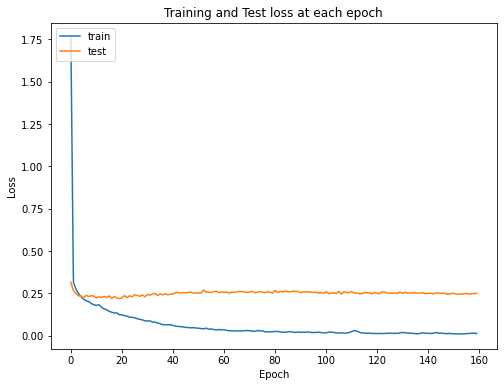

In [10]:
# Evaluate model
loss_train = nn2_history.history['loss']
loss_val = nn2_history.history['val_loss']
plt.figure(figsize=(8,6))
plt.plot(nn2_history.history['loss'])
plt.plot(nn2_history.history['val_loss'])
plt.title('Training and Test loss at each epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('train_test_loss.png', dpi=300)
plt.show()